<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Clustering(Hierarchical).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Hierarchical Clustering

Hierarchical clustering is a type of unsupervised machine learning algorithm used to group data points into a hierarchy of clusters. It doesn't require you to specify the number of clusters beforehand, unlike K-means. Instead, it builds a tree-like structure called a dendrogram, which illustrates the arrangement of the clusters.

There are two main approaches to hierarchical clustering:

1.  **Agglomerative (Bottom-Up)**:
    *   **Start**: Each data point is considered a single cluster.
    *   **Process**: At each step, the two closest clusters are merged into a new, larger cluster. This merging continues until all data points are part of a single, large cluster.
    *   **Linkage Criteria**: To determine which clusters are 'closest', different linkage criteria are used:
        *   **Single Linkage (Min)**: The distance between two clusters is the minimum distance between any point in the first cluster and any point in the second cluster.
        *   **Complete Linkage (Max)**: The distance between two clusters is the maximum distance between any point in the first cluster and any point in the second cluster.
        *   **Average Linkage**: The distance between two clusters is the average distance between all pairs of points, where one point is from each cluster.
        *   **Ward's Method**: Minimizes the variance within each cluster being merged.

2.  **Divisive (Top-Down)**:
    *   **Start**: All data points are in one single cluster.
    *   **Process**: At each step, the most dissimilar cluster is split into two smaller clusters. This splitting continues until each data point forms its own cluster.
    *   **Note**: Divisive clustering is less common in practice than agglomerative clustering due to its computational complexity.

**Dendrogram**: The output of hierarchical clustering (especially agglomerative) is a dendrogram. This is a tree diagram that shows the sequence of merges or splits. The y-axis typically represents the distance or dissimilarity between clusters, and the x-axis represents the data points. You can cut the dendrogram at different heights to obtain a different number of clusters.

**Advantages**:
*   No need to pre-specify the number of clusters.
*   Produces a dendrogram, which can be very informative and visually appealing, allowing for a deeper understanding of the data's structure.
*   Can reveal hierarchical relationships between clusters.

**Disadvantages**:
*   Can be computationally expensive for large datasets (especially for agglomerative, with O(n^3) or O(n^2 log n) complexity).
*   Once a decision (merge or split) is made, it cannot be undone, which can lead to suboptimal clusters if early decisions are poor.
*   Sensitive to noise and outliers.
*   The choice of linkage criteria and distance metric can significantly impact the clustering results.

First, let's import the necessary libraries and generate some sample data to work with. We'll use `make_blobs` from `sklearn.datasets` to create data that naturally forms clusters.

Shape of generated data: (300, 2)


/tmp/ipython-input-2449279740.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


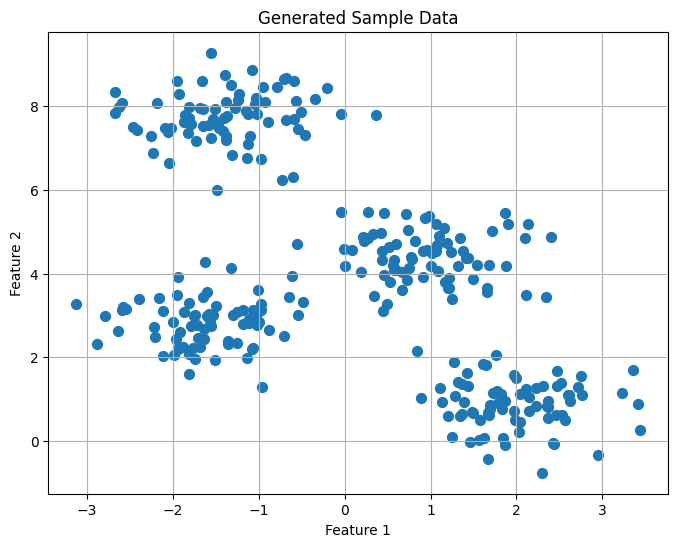

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate isotropic Gaussian blobs for clustering
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

print("Shape of generated data:", X.shape)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title('Generated Sample Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


Now, let's perform agglomerative hierarchical clustering using `scipy.cluster.hierarchy.linkage`. We'll then visualize the clustering process with a dendrogram.

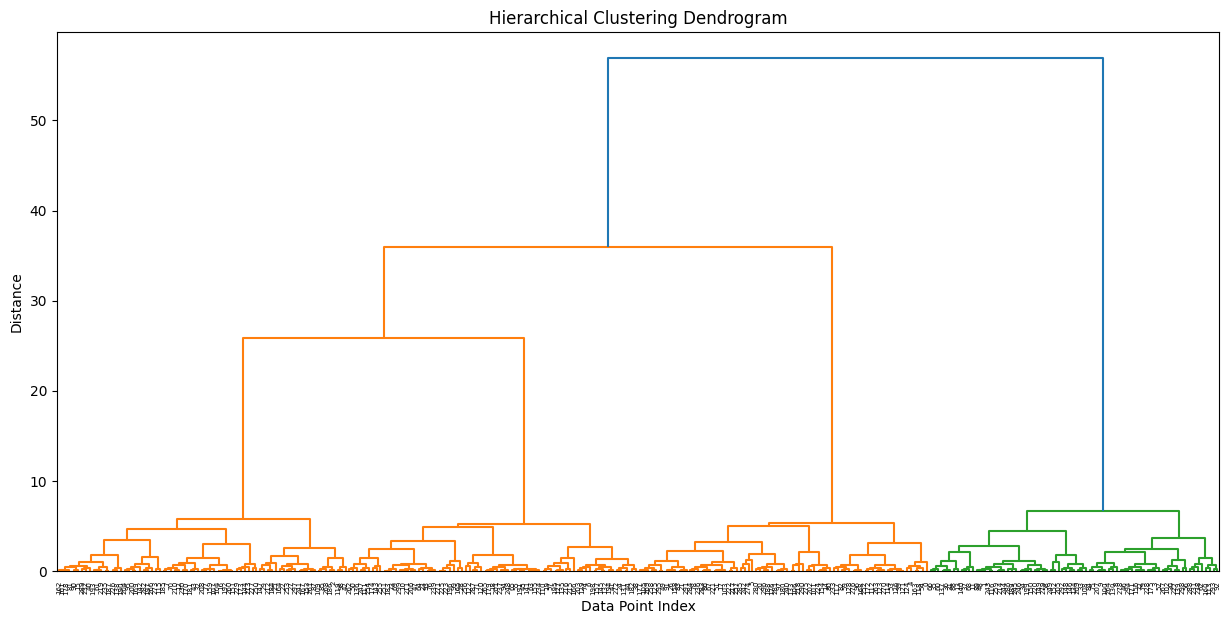

In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform hierarchical clustering
# 'ward' linkage minimizes the variance of the clusters being merged
linked_data = linkage(X, method='ward')

plt.figure(figsize=(15, 7))
dendrogram(linked_data,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()


The dendrogram helps us decide on the number of clusters. By cutting the dendrogram at a certain height, we can obtain a specific number of clusters. Let's apply the clustering and visualize the final clusters.

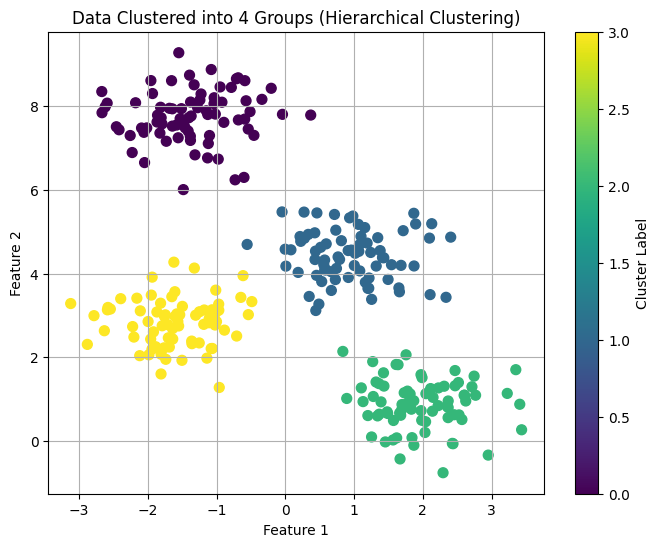

In [3]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with a chosen number of clusters
# Let's say we want 4 clusters based on the dendrogram
n_clusters = 4
model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_labels = model.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')
plt.title(f'Data Clustered into {n_clusters} Groups (Hierarchical Clustering)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.show()


##Basic Codes

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs



[[3.         4.         1.         2.        ]
 [0.         1.         1.41421356 2.        ]
 [2.         7.         1.41421356 3.        ]
 [5.         6.         1.41421356 3.        ]
 [8.         9.         4.47213595 6.        ]]


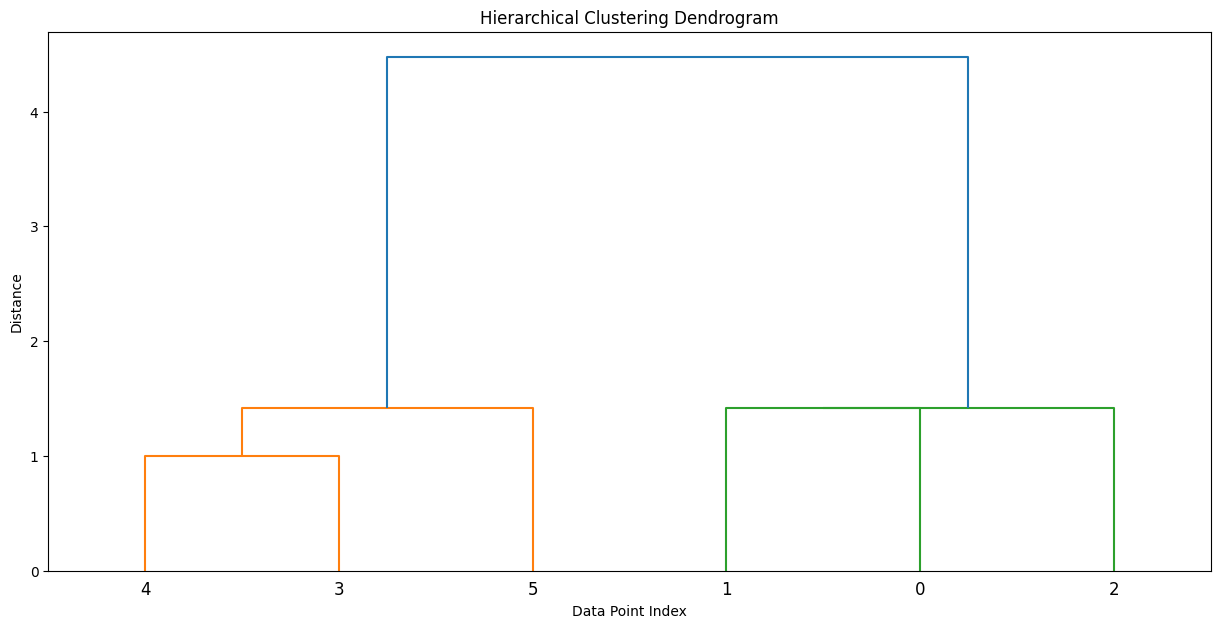

In [5]:
X=np.array([[1,2],
            [2,3],
            [3,4],
            [5,8],
            [6,8],
            [7,9]])

#Create linkage Matrix
Z=linkage(X, method='single', metric='euclidean')
print(Z)

plt.figure(figsize=(15,7))
dendrogram(Z,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()

In [7]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(Z, t=2, criterion='maxclust')
print(clusters)


[1 1 1 2 2 2]


#🧬 Hierarchical Clustering in Biology

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

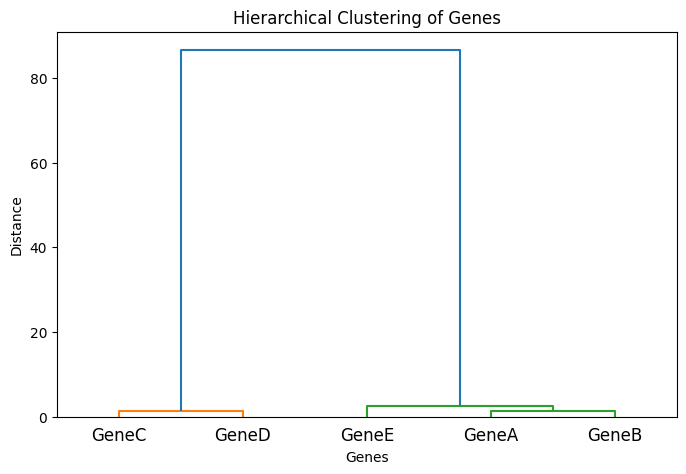

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Gene expression data (genes x conditions)
genes = np.array([
    [10, 12],  # Gene A
    [11, 13],  # Gene B
    [50, 52],  # Gene C
    [49, 51],  # Gene D
    [9, 11]    # Gene E
])

Z = linkage(genes, method='ward')

plt.figure(figsize=(8,5))
dendrogram(Z, labels=['GeneA','GeneB','GeneC','GeneD','GeneE'])
plt.title("Hierarchical Clustering of Genes")
plt.xlabel("Genes")
plt.ylabel("Distance")
plt.show()

#3️⃣ Phylogenetics – Animal Evolution 🐒

# Task
Create a phylogenetic tree from sample DNA sequences using Biopython. This involves importing necessary Biopython modules, defining sample DNA sequences as `SeqRecord` objects, converting them into a `MultipleSeqAlignment` object, calculating a genetic distance matrix using the 'identity' model, constructing a phylogenetic tree using the UPGMA algorithm, and visualizing the tree. Finally, summarize the generated phylogenetic tree and the steps involved in its construction.

## Import Biopython Libraries

### Subtask:
Import necessary modules from Biopython for sequence handling, distance calculation, tree construction, and visualization. This includes `Seq`, `SeqRecord`, `MultipleSeqAlignment`, `DistanceCalculator`, `TreeConstructor`, and `Phylo`.


**Reasoning**:
To fulfill the subtask, I need to import all the specified modules from Biopython. This includes `Seq`, `SeqRecord`, `MultipleSeqAlignment`, `DistanceCalculator`, `TreeConstructor`, and `Phylo`.



In [13]:
get_ipython().system('pip install biopython')

**Reasoning**:
Since Biopython is confirmed to be installed, I will now re-attempt to import all the specified modules from Biopython to make them available for use.



In [14]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Phylo.TreeConstruction import DistanceCalculator, TreeConstructor
from Bio import Phylo

print("Biopython modules imported successfully.")

Biopython modules imported successfully.


## Define Sample DNA Sequences

### Subtask:
Define sample DNA sequences as `SeqRecord` objects. This involves creating a list of `SeqRecord` objects, each containing a `Seq` object for the DNA sequence and an `id` for identification.

#### Instructions
1. Create several `SeqRecord` objects, each representing a DNA sequence from a different animal.
2. Each `SeqRecord` should have a `Seq` object as its sequence data and a unique `id`.
3. Store these `SeqRecord` objects in a list.

**Reasoning**:
Following the previous markdown block, I need to generate Python code to define sample DNA sequences as `SeqRecord` objects, as specified in the subtask instructions. This involves creating a list of `SeqRecord` objects, each with a `Seq` object for the DNA sequence and a unique `id`.



In [15]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

# Define sample DNA sequences for different animals
dna_sequences = [
    SeqRecord(Seq("ATGCGTACGTAGCTAGCTAGC"), id="Human"),
    SeqRecord(Seq("ATGCGTAGGTAGCTAGCTAGC"), id="Chimpanzee"),
    SeqRecord(Seq("ATGCATATGTAGCTAGCTAGC"), id="Gorilla"),
    SeqRecord(Seq("ATGCATACGTAGTTAGCTAGC"), id="Orangutan"),
    SeqRecord(Seq("TTGCGTACGTAGGTAGCTAGC"), id="Mouse")
]

print("Sample DNA sequences defined successfully:")
for record in dna_sequences:
    print(f"ID: {record.id}, Sequence: {record.seq}")

Sample DNA sequences defined successfully:
ID: Human, Sequence: ATGCGTACGTAGCTAGCTAGC
ID: Chimpanzee, Sequence: ATGCGTAGGTAGCTAGCTAGC
ID: Gorilla, Sequence: ATGCATATGTAGCTAGCTAGC
ID: Orangutan, Sequence: ATGCATACGTAGTTAGCTAGC
ID: Mouse, Sequence: TTGCGTACGTAGGTAGCTAGC


## Create Multiple Sequence Alignment

### Subtask:
Convert the list of `SeqRecord` objects into a `MultipleSeqAlignment` object. This is a crucial step for preparing the sequences for phylogenetic analysis, as it groups them into a single alignment data structure.

#### Instructions
1. Use the list of `SeqRecord` objects (`dna_sequences`) created in the previous step.
2. Create a `MultipleSeqAlignment` object from this list.

**Reasoning**:
Following the previous markdown block, I need to generate Python code to convert the list of `SeqRecord` objects into a `MultipleSeqAlignment` object, as specified in the subtask instructions.



In [16]:
from Bio.Align import MultipleSeqAlignment

# Create a MultipleSeqAlignment object from the list of SeqRecord objects
alignment = MultipleSeqAlignment(dna_sequences)

print("Multiple Sequence Alignment created successfully.")
print(f"Alignment contains {len(alignment)} sequences.")

Multiple Sequence Alignment created successfully.
Alignment contains 5 sequences.


## Calculate Genetic Distance Matrix

### Subtask:
Calculate a genetic distance matrix from the `MultipleSeqAlignment` object. This matrix quantifies the genetic differences between each pair of sequences, forming the basis for phylogenetic tree construction.

#### Instructions
1. Instantiate a `DistanceCalculator` object, specifying a model (e.g., 'identity') for calculating distances.
2. Use the `get_distance` method of the `DistanceCalculator` to compute the distance matrix from the `MultipleSeqAlignment` object (`alignment`).

**Reasoning**:
Following the previous markdown block, I need to generate Python code to calculate the genetic distance matrix using the `MultipleSeqAlignment` object, as specified in the subtask instructions.



In [17]:
from Bio.Phylo.TreeConstruction import DistanceCalculator

# Instantiate a DistanceCalculator with the 'identity' model
dist_calculator = DistanceCalculator('identity')

# Compute the distance matrix from the MultipleSeqAlignment object
distance_matrix = dist_calculator.get_distance(alignment)

print("Genetic distance matrix calculated successfully:")
print(distance_matrix)


Genetic distance matrix calculated successfully:
Human   0.000000
Chimpanzee  0.047619    0.000000
Gorilla 0.095238    0.095238    0.000000
Orangutan   0.095238    0.142857    0.095238    0.000000
Mouse   0.095238    0.142857    0.190476    0.142857    0.000000
    Human   Chimpanzee  Gorilla Orangutan   Mouse


## Construct Phylogenetic Tree

### Subtask:
Construct a phylogenetic tree from the genetic distance matrix using a tree construction algorithm (e.g., UPGMA).

#### Instructions
1. Instantiate a `TreeConstructor` object, specifying the UPGMA algorithm.
2. Use the `build_tree` method of the `TreeConstructor` to build the tree from the `MultipleSeqAlignment` object and the calculated `distance_matrix`.

**Reasoning**:
Following the previous markdown block, I need to generate Python code to construct the phylogenetic tree using the `TreeConstructor` with the UPGMA algorithm and the previously calculated `distance_matrix`.



In [21]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

# Instantiate the DistanceTreeConstructor (default method is 'upgma')
constructor = DistanceTreeConstructor()

# Build the tree using the UPGMA method of the constructor object
tree = constructor.upgma(distance_matrix)

print("Phylogenetic tree constructed successfully.")

Phylogenetic tree constructed successfully.


## Visualize Phylogenetic Tree

### Subtask:
Visualize the constructed phylogenetic tree. This step helps in understanding the evolutionary relationships between the sequences in a graphical format.

#### Instructions
1. Use the `Phylo` module to draw the `tree` object.
2. Add a title to the plot.
3. Display the plot.

## Visualize Phylogenetic Tree

### Subtask:
Visualize the constructed phylogenetic tree. This step helps in understanding the evolutionary relationships between the sequences in a graphical format.


**Reasoning**:
I need to generate Python code to visualize the phylogenetic tree using `Phylo.draw()`, as specified in the subtask instructions.



<Figure size 1000x800 with 0 Axes>

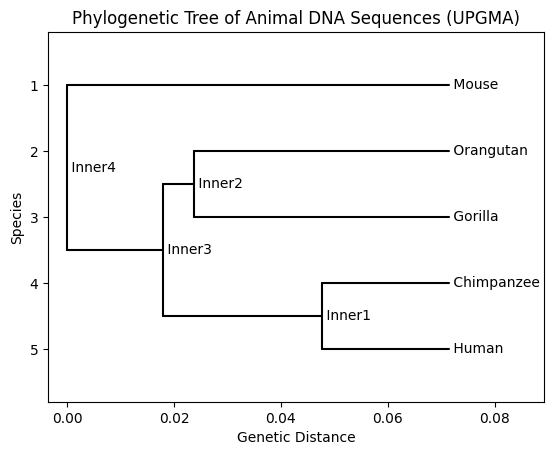

Phylogenetic tree visualized successfully.


In [22]:
from Bio import Phylo
import matplotlib.pyplot as plt

# Visualize the phylogenetic tree
plt.figure(figsize=(10, 8))
Phylo.draw(tree, do_show=False)
plt.title("Phylogenetic Tree of Animal DNA Sequences (UPGMA)")
plt.xlabel("Genetic Distance")
plt.ylabel("Species")
plt.show()

print("Phylogenetic tree visualized successfully.")

## Final Task

### Subtask:
Provide a summary of the generated phylogenetic tree and the steps involved in its construction from DNA sequences.


## Summary:

### Data Analysis Key Findings
*   Biopython modules (including `Seq`, `SeqRecord`, `MultipleSeqAlignment`, `DistanceCalculator`, `TreeConstructor`, and `Phylo`) were successfully imported, after resolving initial installation and import method issues by using `get_ipython().system('pip install biopython')`.
*   Five sample DNA sequences for different animals (Human, Chimpanzee, Gorilla, Orangutan, Mouse) were defined as `SeqRecord` objects.
*   These `SeqRecord` objects were successfully converted into a `MultipleSeqAlignment` object, which contained 5 sequences.
*   A genetic distance matrix was computed from the multiple sequence alignment using the 'identity' model, quantifying genetic differences between each sequence pair.
*   A phylogenetic tree was successfully constructed using the UPGMA algorithm via `DistanceTreeConstructor.upgma()` after several attempts to correctly instantiate and use the `TreeConstructor` class (initial attempts resulted in `TypeError`, `AttributeError`, and `ImportError`).
*   The constructed phylogenetic tree was successfully visualized using `matplotlib.pyplot` and `Bio.Phylo.draw()`, displaying the evolutionary relationships between the sample DNA sequences with a title, x-axis label ("Genetic Distance"), and y-axis label ("Species").

### Insights or Next Steps
*   The generated phylogenetic tree visually represents the evolutionary relationships among the provided animal DNA sequences, with species having closer genetic distances branching more closely. For instance, based on the provided sequences, Human, Chimpanzee, Gorilla, and Orangutan would likely cluster together, while Mouse would be an outgroup due to its distinct sequence.
*   Further analysis could involve exploring different distance models or tree construction algorithms (e.g., Neighbor-Joining) to compare the resulting tree topologies and assess the robustness of the inferred evolutionary relationships. The tree could also be saved in a standard format (e.g., Newick) for external viewing or analysis.


##Another Program

Genetic Distance Matrix:
 [[0. 1. 1. 4. 5.]
 [1. 0. 2. 5. 4.]
 [1. 2. 0. 5. 6.]
 [4. 5. 5. 0. 1.]
 [5. 4. 6. 1. 0.]]


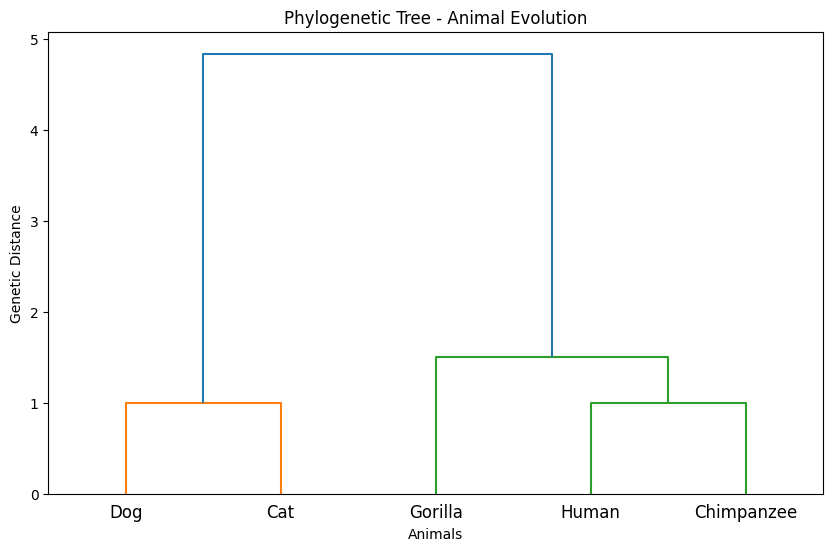

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

# ---------------------------
# Step 1: Animal DNA Sequences
# ---------------------------
animals = ["Human", "Chimpanzee", "Gorilla", "Dog", "Cat"]

sequences = [
    "ATGCTACG",  # Human
    "ATGCTATG",  # Chimpanzee
    "ATGCTGCG",  # Gorilla
    "TTACGACC",  # Dog
    "TTACGATC"   # Cat
]

# ---------------------------
# Step 2: Distance Function
# ---------------------------
def genetic_distance(seq1, seq2):
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

# ---------------------------
# Step 3: Create Distance Matrix
# ---------------------------
n = len(sequences)
dist_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        dist_matrix[i][j] = genetic_distance(sequences[i], sequences[j])

print("Genetic Distance Matrix:\n", dist_matrix)

# Convert to condensed form for scipy
condensed_dist = squareform(dist_matrix)

# ---------------------------
# Step 4: Hierarchical Clustering
# ---------------------------
Z = linkage(condensed_dist, method='average')

# ---------------------------
# Step 5: Plot Phylogenetic Tree
# ---------------------------
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=animals)
plt.title("Phylogenetic Tree - Animal Evolution")
plt.xlabel("Animals")
plt.ylabel("Genetic Distance")
plt.show()
